In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
path_dir = 'E:\\PycharmProjects\\Demo0410\\work_data_liziqi\\data'
excel_file = 'shenghuo_comments_36333.xlsx'
path_file = os.path.join(path_dir,excel_file)

In [3]:
shenghuo_comments_df = pd.read_excel(path_file,usecols=['title','text','user_name','create_time'])
shenghuo_comments_df.index = shenghuo_comments_df.index + 1
xiangwang_time_df = shenghuo_comments_df.loc[shenghuo_comments_df['text'].str.contains('向往', na=False)]  #选取其中包含“向往”一词的数据。
xiangwang_time_df.index = (xiangwang_time_df.reset_index()).index + 1  #重新设置筛选后的数据框并使索引从1开始。

In [4]:
xiangwang_title_df = xiangwang_time_df.groupby(['title'])
xiangwang_num = dict(xiangwang_title_df.size())
xiangwang_num_df = (pd.DataFrame.from_dict(xiangwang_num,orient='index')).reset_index(drop=False)
xiangwang_num_df.rename(columns = {'index':'title',0:'num'},inplace=True)
xiangwang_num_df.index = xiangwang_num_df.index + 1
#xiangwang_num_df.to_excel(path_dir + '\\' + 'xiangwang_frq.xlsx')
xiangwang_num_df

,title,num
1,「好蟹抢先加购」玲珑熟醉蟹，别样的秋冬“甜品”，鲜香满溢,14
2,【朝花柒拾鲜花饼】玫………瑰花…的一生？,14
3,【柳州螺蛳粉】吃得满足，嗦得过瘾，辣得舒坦，就一碗柳州螺蛳粉,79
4,【桂花坚果藕粉】大颗坚果，桂花飘香，老人小孩都爱的传统甜品！,19
5,【红豆薏米粉】夏天贪凉必备，老人口口念叨的好,31
...,...,...
107,面条又薄又宽，浇上香浓的鲜美汤汁，来一碗山西刀削面吧,1
108,驱散湿气的暖胃汤锅，番茄牛腩带来的味觉盛宴,57
109,骑马踏青，取花为食，才不辜负春日好时节——上巳节,91
110,黄瓜正当季，那就变着法来吃个黄瓜吧,176


In [5]:
all_video = pd.read_excel('E:\\PycharmProjects\\Demo0410\work_data_liziqi\\李子柒今日头条视频数据采集\\李子柒全部视频信息.xlsx')
title_list = list(xiangwang_num_df['title'])
filter_all_video_df = all_video.loc[all_video['标题'].isin(title_list)]  #在dataframe中查找指定list列表中的行。
num_list = []
for i in filter_all_video_df['标题']:
    num = xiangwang_num_df[xiangwang_num_df['title'] == i]['num']
    num = num.to_list()  #将查找出的series转换为列表。
    num_list.append(num[0])
filter_all_video_df['num'] = num_list  #将num_list加入到表格中。
filter_all_video_df.index = ((filter_all_video_df.reset_index()).index) + 1  #重新设置索引。
filter_all_video_df['id'] = filter_all_video_df['id'].map(str)  #将id列的数值转换为字符串。
filter_all_video_df.to_excel(path_dir+'\\'+'向往_frq_time.xlsx')


e:\pycharmprojects\demo0410\venv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
e:\pycharmprojects\demo0410\venv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [6]:
xiangwang_video_100 = filter_all_video_df[filter_all_video_df['num'] >= 100]
xiangwang_video_100 = xiangwang_video_100.sort_values(axis=0,ascending=True,by=['发布时间'])  #对表格按时间先后顺序进行排序。
xiangwang_video_100.index = ((xiangwang_video_100.reset_index()).index) + 1
#xiangwang_video_100['id'] = xiangwang_video_100['id'].map(str)  #将id列的数值转换为字符串。
xiangwang_video_100.to_excel(path_dir+'\\'+'向往_frq_100_time.xlsx')

In [7]:
list_time = []
for time in xiangwang_video_100['发布时间']:
    time = time.year*10000 + time.month*100 + time.day
    list_time.append(time)
list_num = list(xiangwang_video_100['num'])

In [8]:
'''
all_video = pd.read_excel('E:\\PycharmProjects\\Demo0410\work_data_liziqi\\李子柒今日头条视频数据采集\\李子柒全部视频信息.xlsx',index_col=0)
date = []
for t in xiangwang_num_df['title']:
    d = all_video[all_video['标题'] == t]['发布时间']  #查找表格all_video“标题”列t元素所在行的发布时间。
    d = d.to_list()  #查出结果为一个序列，将此序列转换为列表，以进行后续处理。
    date.append(d[0])  #此列表只有唯一的一个元素，将此元素加入总列表。
xiangwang_num_df['date'] = date  #将时间列表加入表格中。
#xiangwang_num_df
'''

"\nall_video = pd.read_excel('E:\\PycharmProjects\\Demo0410\\work_data_liziqi\\李子柒今日头条视频数据采集\\李子柒全部视频信息.xlsx',index_col=0)\ndate = []\nfor t in xiangwang_num_df['title']:\n    d = all_video[all_video['标题'] == t]['发布时间']  #查找表格all_video“标题”列t元素所在行的发布时间。\n    d = d.to_list()  #查出结果为一个序列，将此序列转换为列表，以进行后续处理。\n    date.append(d[0])  #此列表只有唯一的一个元素，将此元素加入总列表。\nxiangwang_num_df['date'] = date  #将时间列表加入表格中。\n#xiangwang_num_df\n"

In [9]:
'''
def date_to_int(i):
    y = i.year*10000 + i.month*100 + i.day
    return y
xiangwang_num_df['date_int'] = xiangwang_num_df['date'].map(date_to_int)
xiangwang_num_df.to_excel(path_dir+'\\'+'xiangwang_frq_time.xlsx')
'''

"\ndef date_to_int(i):\n    y = i.year*10000 + i.month*100 + i.day\n    return y\nxiangwang_num_df['date_int'] = xiangwang_num_df['date'].map(date_to_int)\nxiangwang_num_df.to_excel(path_dir+'\\'+'xiangwang_frq_time.xlsx')\n"

In [10]:
'''
xiangwang_time_df['create_time'] = pd.to_datetime(xiangwang_time_df['create_time'],unit='s')  #利用pd.to_datatime方法将时间戳转换为日期、日间格式，参数unit='s'表示将原点时间设置为1970-01-01。
xiangwang_time_df['year_month'] = xiangwang_time_df['create_time'].map(lambda x: 100*x.year + x.month)  #提取年份和月份，转换为类似于202105的格式。

from collections import Counter
data = Counter(xiangwang_time_df['year_month'])

s  = sorted(data)
s

list_time = []
list_tnum = []
for i in sorted(data):
    print(i,data[i])
    list_time.append(i)
    list_tnum.append(data[i])
'''

"\nxiangwang_time_df['create_time'] = pd.to_datetime(xiangwang_time_df['create_time'],unit='s')  #利用pd.to_datatime方法将时间戳转换为日期、日间格式，参数unit='s'表示将原点时间设置为1970-01-01。\nxiangwang_time_df['year_month'] = xiangwang_time_df['create_time'].map(lambda x: 100*x.year + x.month)  #提取年份和月份，转换为类似于202105的格式。\n\nfrom collections import Counter\ndata = Counter(xiangwang_time_df['year_month'])\n\ns  = sorted(data)\ns\n\nlist_time = []\nlist_tnum = []\nfor i in sorted(data):\n    print(i,data[i])\n    list_time.append(i)\n    list_tnum.append(data[i])\n"

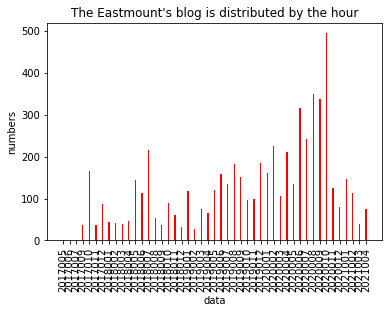

In [72]:
import matplotlib.pyplot as plt
N = 47
ind = np.arange(N)
width=0.2
plt.bar(ind, list_num, width, color='r', label='hour')
plt.xticks(ind, list_time, rotation=90)
plt.title("The Eastmount's blog is distributed by the hour")
plt.xlabel('data')
plt.ylabel('numbers')
#plt.savefig('Eastmount-01.png',dpi=400)
plt.show()


In [11]:
from pyecharts import options as opts
from pyecharts.charts import Bar

bar=(
    Bar()
        .add_xaxis(list_time)
        .add_yaxis("次数", list_num, color="black")
        .set_global_opts(title_opts=opts.TitleOpts(
            title='单条视频中“向往”一词出现频率', subtitle="横坐标为发布视频的时间"),
        xaxis_opts=opts.AxisOpts(axislabel_opts=opts.LabelOpts(
            # is_show=True 是否显示标签
            is_show=True,
            # position 标签的位置 可选 'top'，'left'，'right'，'bottom'，'inside'，'insideLeft'，'insideRight'.....
            position='bottom',
            # font_size 文字的字体大小
            font_size=10,
            # color 文字的颜色
            #color= '#FF6633',
            # font_style 文字字体的风格，可选 'normal'，'italic'，'oblique'
            #font_style = 'italic' , #斜体
            # font_weight 文字字体的粗细  'normal'，'bold'，'bolder'，'lighter'，不设置则为None。
            font_weight = 'bold',
            # font_family 字体 'Arial', 'Courier New', 'Microsoft YaHei（微软雅黑）' ....
            font_family = None,
            # rotate 标签旋转 从 -90 度到 90 度。正值是逆时针
            rotate = '20',
            # margin 刻度标签与轴线之间的距离
            margin = 25,
            # 坐标轴刻度标签的显示间隔，在类目轴中有效。Union[Numeric, str, None]
            # 默认会采用标签不重叠的策略间隔显示标签。
            # 可以设置成 0 强制显示所有标签。
            # 如果设置为 1，表示『隔一个标签显示一个标签』，如果值为 2，表示隔两个标签显示一个标签，以此类推。
            # 可以用数值表示间隔的数据，也可以通过回调函数控制。回调函数格式如下：
            # (index:number, value: string) => boolean
            # 第一个参数是类目的 index，第二个值是类目名称，如果跳过则返回 false。
            interval = None,
            # horizontal_align 文字水平对齐方式，默认自动。可选：'left'，'center'，'right'
            horizontal_align = 'center',
            # vertical_align 文字垂直对齐方式，默认自动。可选：'top'，'middle'，'bottom'
            vertical_align = None,
        ))
    )
    )
bar.render(path_dir + '\\' +'“向往”一词在各视频中出现的频率分布图.html')


'E:\\PycharmProjects\\Demo0410\\work_data_liziqi\\data\\“向往”一词在各视频中出现的频率分布图.html'